# Algorithms 1: Do Something!

Today's exercise is to make a piece of code that completes a useful task, but write it as generalized as possible to be reusable for other people (including Future You)!

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Documentation

A "Docstring" is required for every function you write. Otherwise you will forget what it does and how it does it!

One very common docstring format is the "[NumPy/SciPy](https://github.com/numpy/numpy/blob/master/doc/HOWTO_DOCUMENT.rst.txt)" standard:

Below is a working function with a valid docstring as an example:

In [4]:
def MyFunc(arg1, arg2, kwarg1=5.0):
    '''
    This is a function to calculate the number of quatloos required
    to reverse the polarity of a neutron flow.
    
    Parameters
    ----------
    arg1 : float
        How many bleeps per blorp
    arg2 : float
        The foo/bar parameter
    kwarg1 : float, optional
        The quatloo to gold-pressed-latinum exchange rate
    Returns
    -------
    float
        A specific resultification index
    '''
    
    if kwarg1 > 5.0:
        print("wow, that's a lot of quatloos...")

    # this is the classical formula we learn in grade school
    output = arg1 + arg2 * kwarg1
        
    return output

In [5]:
# how to use the function
x = MyFunc(7,8, kwarg1=9.2)

wow, that's a lot of quatloos...


In [6]:
# Check out the function's result
print(x)

80.6


In [7]:
# convert Kelvin to Fahrenheit

def TempConvert(temp, K2F = True):
    '''
    This is a function to calculate the temperature in Fahrenheit
    with a given input in Kelvin, and vice versa.
    
    Parameters
    ----------
    temp : float
        The input temperature
    K2F : boolean
        The input temperature's unit, assumes Kelvin to Fahrenheit.
  
    Returns
    -------
    float
        The Fahrenheit equivalent to input.
    '''
    # this is the classical formula we learn in grade school
    if K2F == True:
        output = (9/5 * (temp - 273)) + 32
    else: 
        output = (5/9 * (temp - 32)) + 273
        
    return output

In [8]:
# Insert the degrees and "True" if converting from K to F, "False" if converting from F to K.
x = TempConvert(32, False)

# check
print(x)

273.0


## Today's Algorithm

Here's the goal:

**Which constellation is a given point in?**

This is where you could find the detailed constellation boundary lines data:
http://vizier.cfa.harvard.edu/viz-bin/Cat?cat=VI%2F49
You could use this data and do the full "Ray Casting" approach, or even cheat using matpltlib functions!
http://stackoverflow.com/a/23453678

**BUT**
A simplified approach has been developed (that you should use!) from [Roman (1987)](http://cdsads.u-strasbg.fr/abs/1987PASP...99..695R)

In [9]:
# This is how to read in the coordinates and constellation names using Pandas
# (this is a cleaned up version of Table 1 from Roman (1987) I prepared for you!)

df = pd.read_csv('data/data.csv')
df

,RA_low,RA_up,DE_low,name
0,0.0000,24.0000,88.0000,UMI
1,8.0000,14.5000,86.5000,UMI
2,21.0000,23.0000,86.1667,UMI
3,18.0000,21.0000,86.0000,UMI
4,0.0000,8.0000,85.0000,CEP
5,9.1667,10.6667,82.0000,CAM
6,0.0000,5.0000,80.0000,CEP
7,10.6667,14.5000,80.0000,CAM
8,17.5000,18.0000,80.0000,UMI
9,20.1667,21.0000,80.0000,DRA


In [10]:
# Determine which constellation a given coordinate is in.

def howard_constellation(ra, dec):
    '''
    This is a function to determine which constellation a given coordinate is in.
    
    Parameters
    ----------
    ra : float
        The right assention coordinate of the input.
        
    dec : float
        The declination coordinate of the input.
        
    index : int
        The indeces in which the coordinate passes the conditionals. (Includes MORE than just the constellation it's in.)
        
    boundsIndex : int
        The indeces in which the coordinate passes the conditionals. (Includes MORE than just the constellation it's in.)
  
    Returns
    -------
    string
        The constellation the given coordinate is in.
    plot
        
    '''
    
    # This is how to read in the coordinates and constellation names using Pandas

    df = pd.read_csv('data/data.csv')
    
    '''Based on the literature:
        Read down the column headed "DE_low" until a declination lower than or 
            equal to the declination of the input is reached.
        Read down the column headed "RA_up" until a right assention greater than
            or equal to the right assention of the input is reached.
        Read down the column headed "RA_low" until a right assention lower than or
            equal to the right assention of the input is reached.
        The FIRST index where this is true is the constellation in which the coordinate
            is located.'''

    index = np.where((dec >= df['DE_low']) & (ra <= df['RA_up']) & (ra >= df['RA_low']))[0]
    
    output = df['name'].values[index][0]
    
    '''
        Attempting to draw the constellation boundaries and the point of the ra/dec input.
    '''
            
    boundsIndex = np.where(df['name'] == output)[0]
    plt.plot(df['RA_up'][boundsIndex], df['DE_low'][boundsIndex])
    plt.plot(df['RA_low'][boundsIndex], df['DE_low'][boundsIndex])
    plt.scatter(ra,dec)
    plt.show()
    
    return output

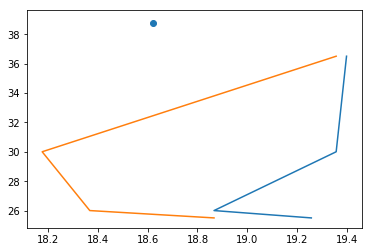

LYR


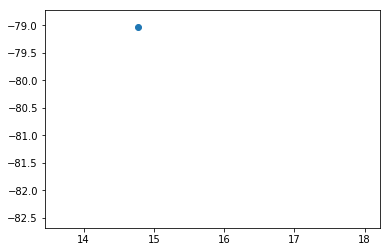

APS


In [11]:
# TESTS FOR YOUR FUNCTION!

# these coordinates SHOULD be in constellation "LYR"
ra=18.62
dec=38.78

x = constellation(ra, dec)
print(x)

# these should be in "APS"
ra=14.78
dec=-79.03

x = constellation(ra, dec)
print(x)